In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import quantile_transform

In [2]:
plt.style.use('seaborn')

Place fields:
* circular
* roughly same size
* holes/obstacles are langer than the diameter of place fields
* convex

Try:
0. holes
1. holes
2. holes
3. holes

Requirement: <br>
Trajectory must pass through each pairwise intersection of place fields

In [3]:
N_SAMPLES = 10000
N_FIELDS = 90
N_NEURONS = 600

In [4]:
L = 1
pf_rad = 0.1*L
step = 0.1*L

In [5]:
samples = []

while (len(samples) < N_SAMPLES):
    r = np.random.uniform(0, L, size=2)
    if not(r[0] > 0.25 and r[0] < 0.75 and r[1] > 0.25 and r[1] < 0.75):
        samples.append(r)

In [6]:
samples = np.array(samples).reshape(-1, 2)

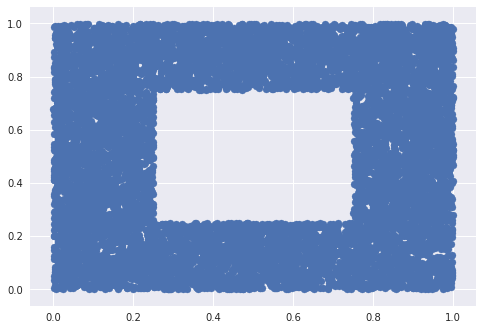

In [7]:
plt.scatter(samples[:, 0], samples[:, 1])

In [8]:
fields = []
while (len(fields) < N_FIELDS):
    r = np.random.uniform(0, L, size=2)
    if not(r[0] > 0.25 and r[0] < 0.75 and r[1] > 0.25 and r[1] < 0.75):
        fields.append(r)

In [9]:
fields = np.array(fields).reshape(-1, 2)

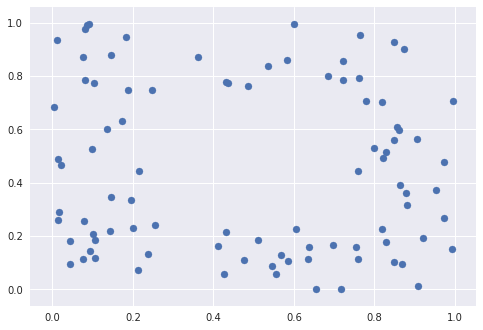

In [10]:
plt.scatter(fields[:, 0], fields[:, 1]);

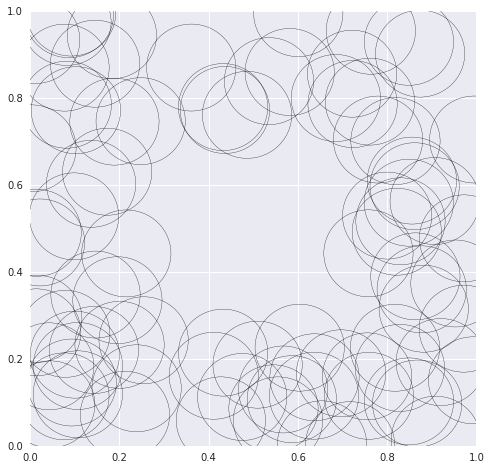

In [11]:
l_fig = 8
fig, ax = plt.subplots(figsize=(l_fig, l_fig), ncols=1)

for f in fields:
    circle = plt.Circle(f, pf_rad, fill=False, edgecolor='black')
    ax.add_artist(circle)


In [12]:
cells = np.random.uniform(0, 0.2, size=(N_SAMPLES, N_NEURONS))

In [13]:
cells

array([[0.09839823, 0.15535635, 0.14462263, ..., 0.12366224, 0.04843426,
        0.0932515 ],
       [0.17565898, 0.02518252, 0.0613497 , ..., 0.18166551, 0.07770512,
        0.19877308],
       [0.00029498, 0.05637171, 0.1640289 , ..., 0.1053416 , 0.09881255,
        0.15651766],
       ...,
       [0.1191722 , 0.06213987, 0.12075953, ..., 0.11889031, 0.04190599,
        0.10882691],
       [0.07202118, 0.05576554, 0.11981664, ..., 0.19738003, 0.07389465,
        0.11585452],
       [0.02720116, 0.09378023, 0.14210874, ..., 0.06722709, 0.07544007,
        0.05665776]])

Each place field is assigned 1 neuron which fires in this specific place field

In [14]:
# for each sample in samples
# see what fields it is in
# cells[i_fields] = np.random.poisson(1)


In [15]:
from math import hypot

for n_sample, s in enumerate(samples):
    idx = []
    for i, f in enumerate(fields):
        if hypot(f[0]-s[0], f[1]-s[1]) < pf_rad:
            idx.append(i)
    #print(idx)
    cells[n_sample, idx] = np.random.poisson(1)

In [16]:
cells

array([[9.83982331e-02, 1.55356350e-01, 1.44622630e-01, ...,
        1.23662238e-01, 4.84342584e-02, 9.32515028e-02],
       [1.75658977e-01, 2.51825158e-02, 6.13496980e-02, ...,
        1.81665508e-01, 7.77051172e-02, 1.98773082e-01],
       [2.94983803e-04, 5.63717081e-02, 1.64028898e-01, ...,
        1.05341601e-01, 9.88125481e-02, 1.56517658e-01],
       ...,
       [1.19172197e-01, 1.00000000e+00, 1.20759528e-01, ...,
        1.18890312e-01, 4.19059873e-02, 1.08826912e-01],
       [7.20211820e-02, 5.57655406e-02, 1.19816641e-01, ...,
        1.97380033e-01, 7.38946545e-02, 1.15854525e-01],
       [2.72011551e-02, 9.37802276e-02, 1.42108738e-01, ...,
        6.72270852e-02, 7.54400694e-02, 5.66577572e-02]])

In [17]:
full = pd.DataFrame(cells)

In [18]:
full.columns = full.columns.astype(str) + 'N'
full['x'] = samples[:, 0]
full['y'] = samples[:, 1]

In [19]:
full

,0N,1N,2N,3N,4N,5N,6N,7N,8N,9N,...,592N,593N,594N,595N,596N,597N,598N,599N,x,y
0,0.098398,0.155356,0.144623,0.148000,0.039185,0.182962,0.199891,0.019089,0.091625,0.091663,...,0.052712,0.094047,0.014986,0.142555,0.092338,0.123662,0.048434,0.093252,0.755422,0.486529
1,0.175659,0.025183,0.061350,0.011131,0.009565,0.141391,0.199288,0.019419,0.049981,0.000000,...,0.181530,0.026169,0.198976,0.030757,0.087675,0.181666,0.077705,0.198773,0.954950,0.475259
2,0.000295,0.056372,0.164029,0.144104,0.056446,0.001668,0.195222,0.013102,0.037086,0.179684,...,0.140538,0.043770,0.099401,0.169376,0.090206,0.105342,0.098813,0.156518,0.946732,0.801285
3,0.029996,0.109628,0.124037,0.111366,0.188718,0.101612,0.031811,0.160737,0.176900,0.043529,...,0.074982,0.175130,0.091714,0.193267,0.124622,0.184965,0.070555,0.161820,0.231616,0.841175
4,0.186819,0.101043,0.081152,0.009228,2.000000,0.053573,0.090103,0.095293,0.188360,0.117824,...,0.010514,0.029531,0.157905,0.151439,0.037012,0.054581,0.088519,0.098581,0.670085,0.890708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.032130,0.165572,0.087448,0.104138,0.199625,0.134923,0.187763,0.097368,0.157084,0.048471,...,0.025417,0.123847,0.086356,0.020216,0.032045,0.172908,0.052486,0.014921,0.665769,0.124311
9996,0.036964,0.068764,0.015427,0.026627,0.007859,0.191768,0.179870,0.016641,0.002405,0.116554,...,0.111114,0.152590,0.142753,0.143429,0.126877,0.131951,0.041511,0.183553,0.768724,0.590493
9997,0.119172,1.000000,0.120760,0.091775,0.166981,0.031745,0.071248,0.060080,0.001555,0.191064,...,0.179856,0.182861,0.185361,0.152017,0.022461,0.118890,0.041906,0.108827,0.131685,0.034320
9998,0.072021,0.055766,0.119817,0.112204,0.126040,0.032846,0.186359,0.133788,0.015450,0.035718,...,0.121129,0.071570,0.023148,0.116542,0.067323,0.197380,0.073895,0.115855,0.880000,0.944846


In [20]:
def get_angle(coordinates, cx = 0, cy = 0):
    return np.angle((coordinates['x'] - cx) + 1j * (coordinates['y'] - cy))

In [21]:
cx = 0.5
cy = 0.5

In [22]:
full['ang'] = get_angle(full, cx, cy)

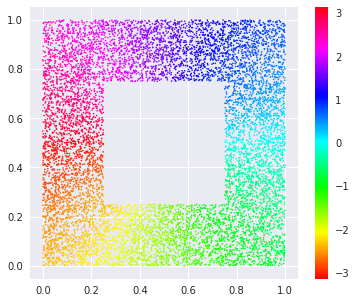

In [23]:
fig, ax = plt.subplots(figsize=(6, 5), ncols=1)
plt.scatter(full['x'], full['y'],
        c=full['ang'],
        cmap='hsv',
        linewidth=0,
        s=2.5)
plt.plot(cx, cy, 'cx') 
plt.colorbar();

In [24]:
mi = full.drop(['x', 'y'], axis=1)

In [25]:
N_NEURONS = 20

In [26]:
from sklearn.feature_selection import mutual_info_regression

In [27]:
mi_scores = mutual_info_regression(mi.drop(['ang'], axis=1), mi['ang'])

In [28]:
mi_scores_df = pd.DataFrame([mi_scores], columns=mi.drop(['ang'],axis=1).columns).T.rename(columns={0: 'mi_score'})

In [29]:
mi_scores_df = mi_scores_df.sort_values(by=['mi_score'], ascending=False)

In [30]:
mi_scores_df = mi_scores_df.iloc[:N_NEURONS]

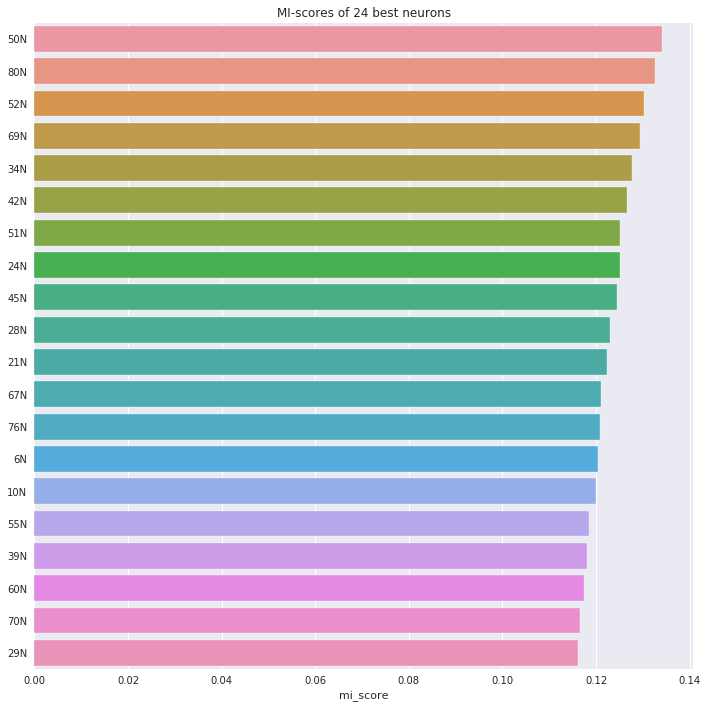

In [31]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1)

ax = sns.barplot(x=mi_scores_df['mi_score'], y=mi_scores_df.index, ax=ax);
ax.set_title("MI-scores of 24 best neurons");
fig.tight_layout();

In [41]:
mi_scores_df.to_csv("data/gen_mi_best_neurons.csv")

In [42]:
full.to_csv("data/gen_clean.csv")

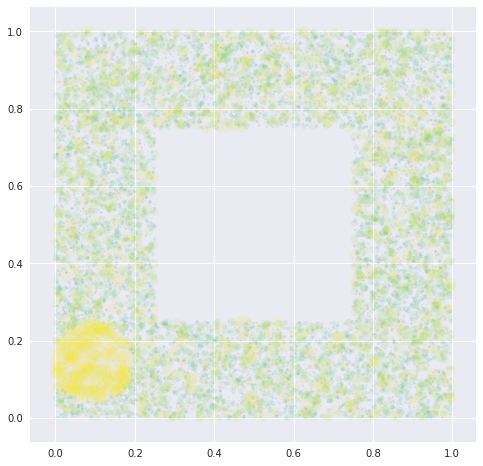

In [37]:
from sklearn.preprocessing import quantile_transform

fig, ax =  plt.subplots(figsize=(l_fig, l_fig), ncols=1)

col='80N'

s = full.loc[:, ['x', 'y', col]].sort_values(col)
s[col] = quantile_transform(s[col].values.reshape(-1, 1), copy=True)
ax.scatter(s['x'], s['y'],
            c=s[col],
            cmap='viridis',
            linewidth=0,
            s=np.exp(5*s[col]),
            alpha=0.1,
            edgecolors='none');